<a href="https://colab.research.google.com/github/amrood153/bike-sales-data/blob/main/dengue%20diagnosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#decision tree


In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
den=pd.read_csv("/content/dd.csv")
den.shape


(5000, 7)

In [ ]:
selected_features = ['Temperature',	'Platelet_Count',	'White_Blood_Cell_Count',	'Body_Pain',	'Rash',	'Gender']

In [ ]:
x=den[selected_features]
y=den['Infected']

In [ ]:
x.sample(5)

,Temperature,Platelet_Count,White_Blood_Cell_Count,Body_Pain,Rash,Gender
654,98.363319,144449.1149,6027.172107,0,0,1
1895,98.966143,178888.2439,6315.003850,1,0,1
4611,97.624863,150151.2036,7761.192373,2,0,0
1516,98.794949,129273.8151,6570.099895,0,0,0
585,97.980291,165277.2070,7441.760650,0,0,0


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=82)

In [ ]:
model=DecisionTreeClassifier()

In [ ]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
k = 5
scores = cross_val_score(model, x_test, y_test, cv=k)

In [ ]:
print(f"Mean cross-validation score:{scores.mean():.2f}")

Mean cross-validation score:0.81


In [ ]:
y_pred=model.predict(x_test)

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [ ]:
mean_abs = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rms = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)


print(f"mean_abs:{mean_abs:.2f}")
print(f"mse:{mse:.2f}")
print(f"rms:{rms:.2f}")
print(f"r2:{r2:.2f}")


mean_abs:0.20
mse:0.20
rms:0.44
r2:-0.01


#####Accuracy = 0.81
######mean_abs:0.20
####mse:0.20

####rms:0.44
####r2:-0.01

#Random Forest


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf = RandomForestClassifier(n_estimators=85,criterion = "gini")

In [ ]:
clf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=85)

In [ ]:
k = 10
scores = cross_val_score(clf, x_test, y_test, cv=k)

In [ ]:
print(f"Mean cross-validation score:{scores.mean():.2f}")

Mean cross-validation score:0.89


In [ ]:
mean_abs = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rms = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)


print(f"mean_abs:{mean_abs:.2f}")
print(f"mse:{mse:.2f}")
print(f"rms:{rms:.2f}")
print(f"r2:{r2:.2f}")

mean_abs:0.20
mse:0.20
rms:0.44
r2:-0.01


###Random Forest results
### accuracy = 0.89



#linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [ ]:
a= LinearRegression()

In [ ]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train_l = scaler.transform(x_train)
x_test_l = scaler.transform(x_test)

In [ ]:
a.fit(x_train_l,y_train)

LinearRegression()

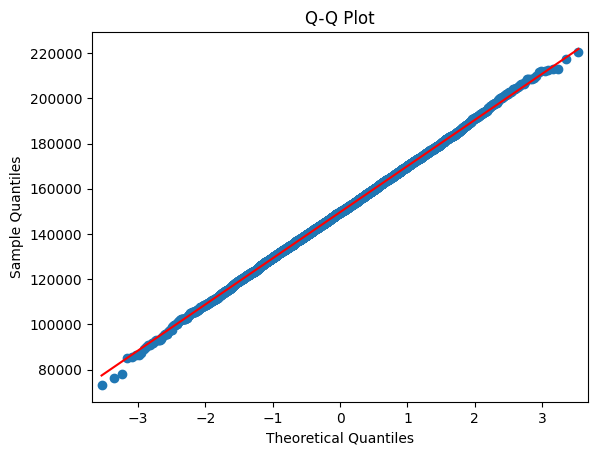

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm

# Generate sample data from a normal distribution
data = den['Platelet_Count']

# Create a Q-Q plot
sm.qqplot(data, line='s')
plt.title('Q-Q Plot')
plt.show()

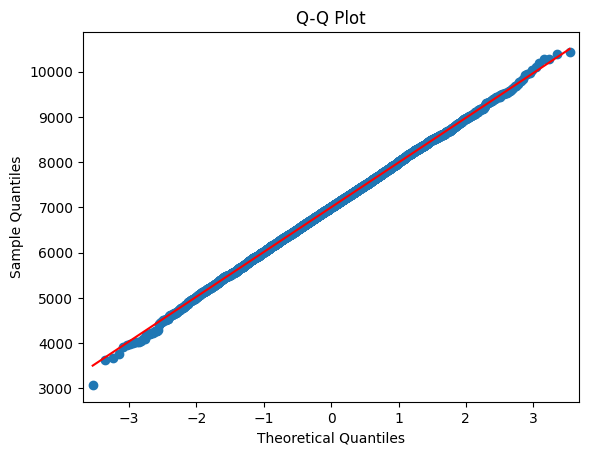

In [ ]:
data = den['White_Blood_Cell_Count']

# Create a Q-Q plot
sm.qqplot(data, line='s')
plt.title('Q-Q Plot')
plt.show()

In [ ]:
k = 5
scores = cross_val_score(a, x_test_l, y_test, cv=k)

In [ ]:
print(f"Mean cross-validation score:{scores.mean():.2f}")

Mean cross-validation score:0.19


In [ ]:
LR = LogisticRegression()
LR.fit(x_train_l,y_train)

LogisticRegression()

In [ ]:
k = 5
scores = cross_val_score(LR, x_test_l, y_test, cv=k)

In [ ]:
print(f"Mean cross-validation score:{scores.mean():.2f}")

Mean cross-validation score:0.74


#SVC

In [ ]:
from sklearn import svm

In [ ]:
b=svm.SVC()

In [ ]:
b.fit(x_train,y_train)

SVC()

In [ ]:
k = 5
scores = cross_val_score(b, x_test_l, y_test, cv=k)

In [ ]:
print(f"Mean cross-validation score:{scores.mean():.2f}")

Mean cross-validation score:0.90


In [ ]:
pred=b.predict(x_test)

In [ ]:
accuracy=accuracy_score(y_test,pred)
print(f"accuracy :{accuracy:.2f}")

accuracy :0.90


In [ ]:
mean_abs = mean_absolute_error(y_test,pred)
mse = mean_squared_error(y_test,pred)
rms = np.sqrt(mse)
r2 = r2_score(y_test,pred)


print(f"mean_abs:{mean_abs:.2f}")
print(f"mse:{mse:.2f}")
print(f"rms:{rms:.2f}")
print(f"r2:{r2:.2f}")

mean_abs:0.10
mse:0.10
rms:0.32
r2:0.48


#neural Network


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [ ]:

from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)



In [ ]:
model = Sequential([
    Dense(128, activation='sigmoid', input_shape=(x_train.shape[1],)),
    Dense(128, activation='relu'),
    Dense(128, activation='tanh'),
    Dense(y_train.shape[1], activation='softmax')
])

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=60, batch_size=52, validation_split=0.3)

Epoch 1/60
54/54 [==============================] - 1s 7ms/step - loss: 0.5851 - accuracy: 0.7132 - val_loss: 0.5186 - val_accuracy: 0.7192
Epoch 2/60
54/54 [==============================] - 0s 4ms/step - loss: 0.5011 - accuracy: 0.7329 - val_loss: 0.4792 - val_accuracy: 0.8158
Epoch 3/60
54/54 [==============================] - 0s 5ms/step - loss: 0.4769 - accuracy: 0.7789 - val_loss: 0.4602 - val_accuracy: 0.8200
Epoch 4/60
54/54 [==============================] - 0s 3ms/step - loss: 0.4303 - accuracy: 0.8743 - val_loss: 0.4131 - val_accuracy: 0.8908
Epoch 5/60
54/54 [==============================] - 0s 3ms/step - loss: 0.3931 - accuracy: 0.8907 - val_loss: 0.4195 - val_accuracy: 0.8908
Epoch 6/60
54/54 [==============================] - 0s 4ms/step - loss: 0.3747 - accuracy: 0.8943 - val_loss: 0.3687 - val_accuracy: 0.8908
Epoch 7/60
54/54 [==============================] - 0s 5ms/step - loss: 0.3661 - accuracy: 0.8943 - val_loss: 0.3773 - val_accuracy: 0.8908
Epoch 8/60
54/54 [==

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

32/32 [==============================] - 0s 2ms/step - loss: 0.3384 - accuracy: 0.8980
Test Accuracy: 0.90


## ann accuracy = 0.90

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
k = 5
scores = cross_val_score(knn, x_test, y_test, cv=k)

In [ ]:
print(f"Mean cross-validation score:{scores.mean():.2f}")

Mean cross-validation score:0.89


##kNN accuracy = 0.89

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

In [ ]:
k = 5
scores = cross_val_score(nb, x_test, y_test, cv=k)

In [ ]:
print(f"Mean cross-validation score:{scores.mean():.2f}")

Mean cross-validation score:0.74


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
gbm = GradientBoostingClassifier(n_estimators=200)


gbm.fit(x_train_l, y_train)

GradientBoostingClassifier(n_estimators=200)

In [ ]:
k = 5
scores = cross_val_score(gbm, x_test_l, y_test, cv=k)

In [ ]:
print(f"Mean cross-validation score:{scores.mean():.2f}")

Mean cross-validation score:0.88


In [ ]:
ada = AdaBoostClassifier()
ada.fit(x_train_l, y_train)

AdaBoostClassifier()

In [ ]:
k = 5
scores = cross_val_score(gbm, x_test_l, y_test, cv=k)


In [ ]:
print(f"Mean cross-validation score:{scores.mean():.2f}")

Mean cross-validation score:0.88


In [ ]:
import xgboost as xgb
import lightgbm as lgb

In [ ]:
xgboost = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=42)

In [ ]:
xgboost.fit(x_train_l, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
k = 5
scores = cross_val_score(xgboost, x_test_l, y_test, cv=k)

In [ ]:
print(f"Mean cross-validation score:{scores.mean():.2f}")

Mean cross-validation score:0.89


In [ ]:
lightgbm = lgb.LGBMClassifier(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=42)

In [ ]:
lightgbm.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 1101, number of negative: 2899
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000177 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 772
[LightGBM] [Info] Number of data points in the train set: 4000, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.275250 -> initscore=-0.968147
[LightGBM] [Info] Start training from score -0.968147
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

LGBMClassifier(max_depth=4, random_state=42)

In [ ]:
den.duplicated().sum()

0